Dataset Overview:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


None


Statistical Summary:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010



Missing Values:


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
PRICE,0



Exploratory Data Analysis:


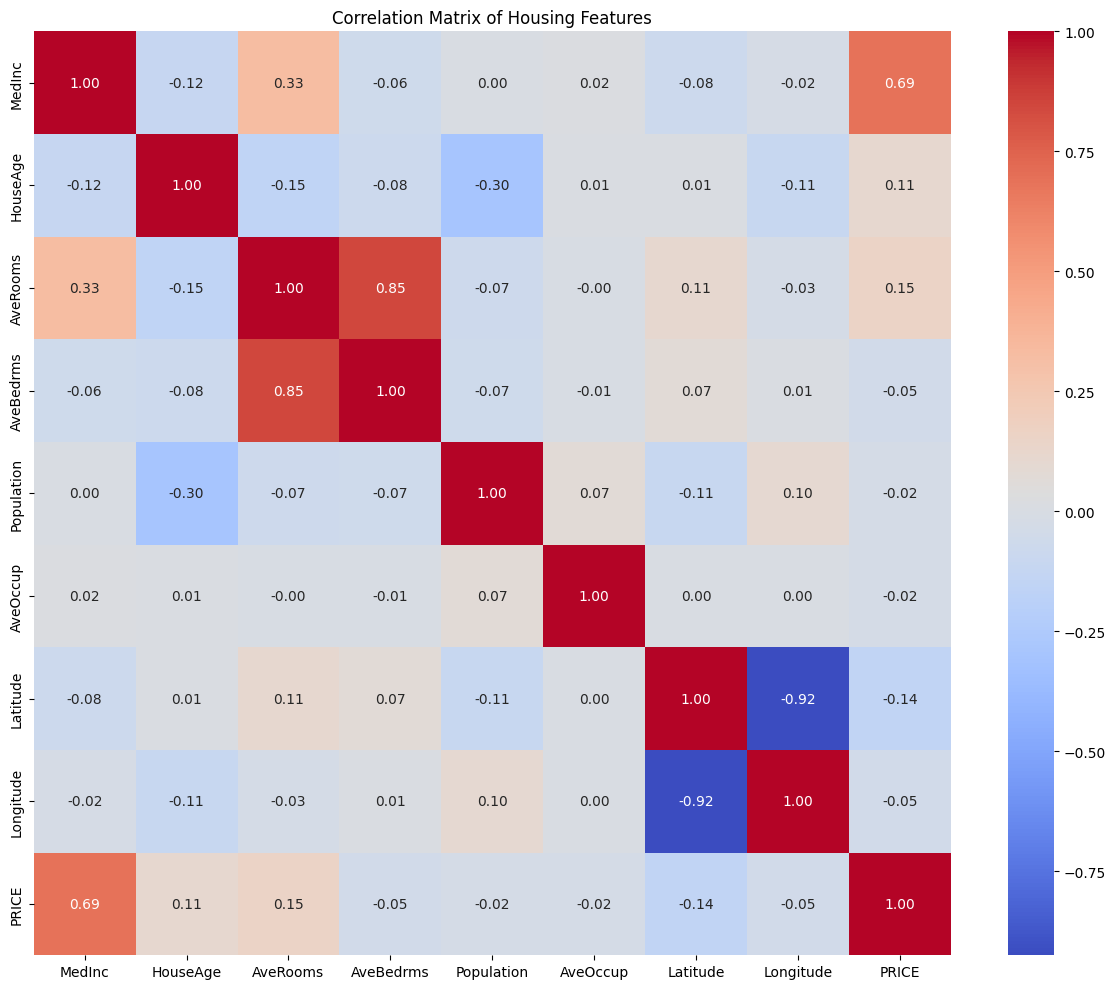

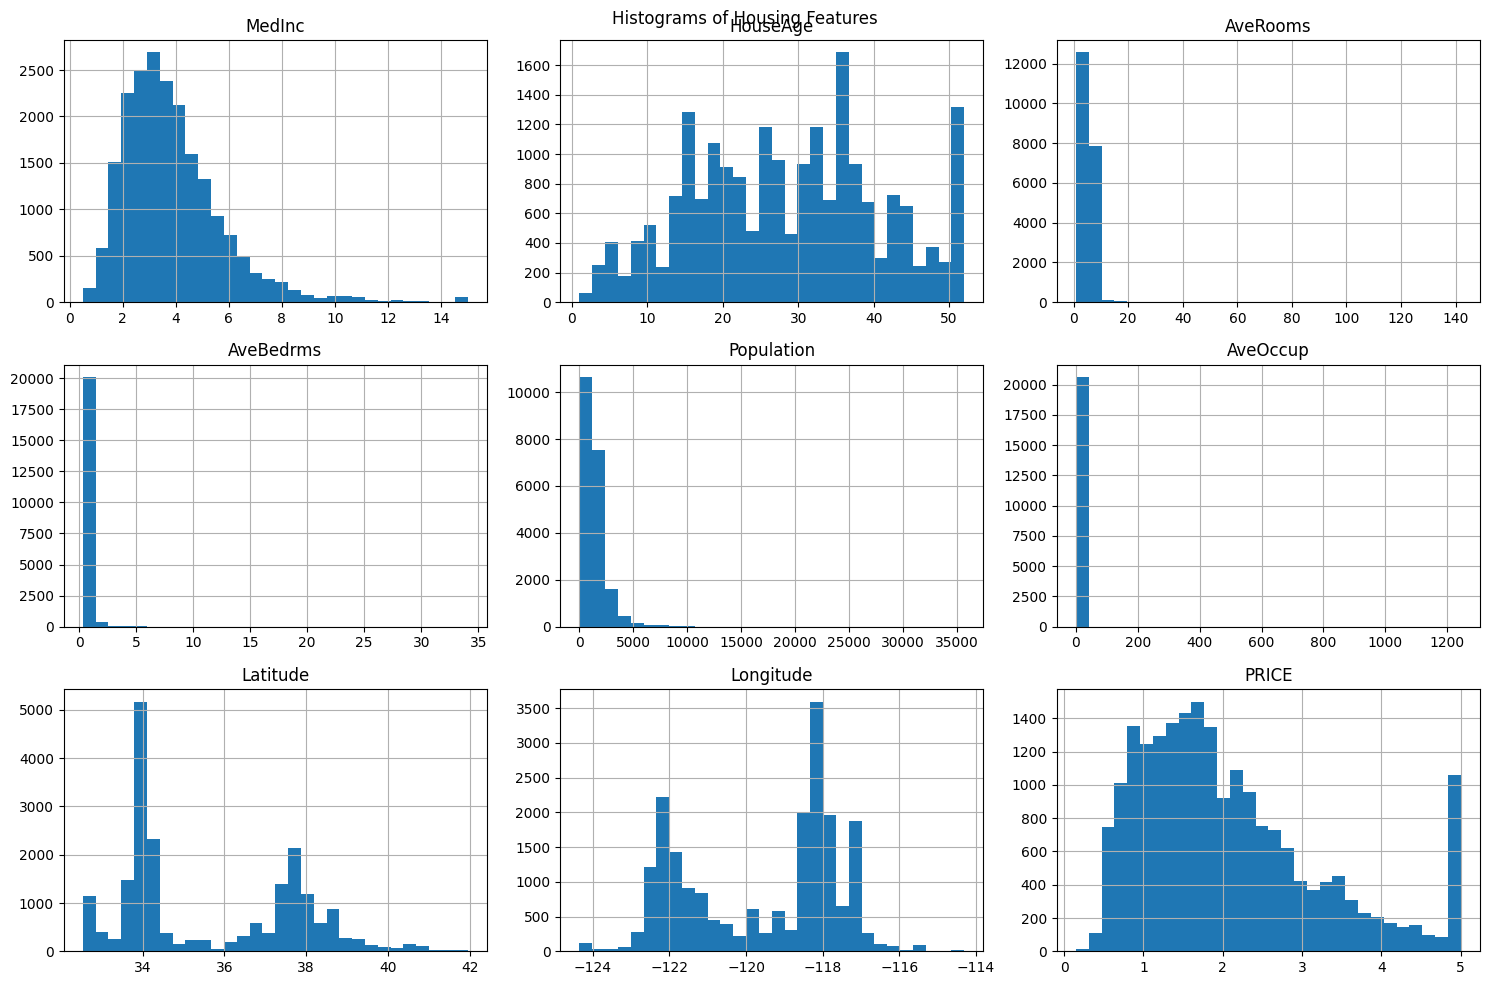

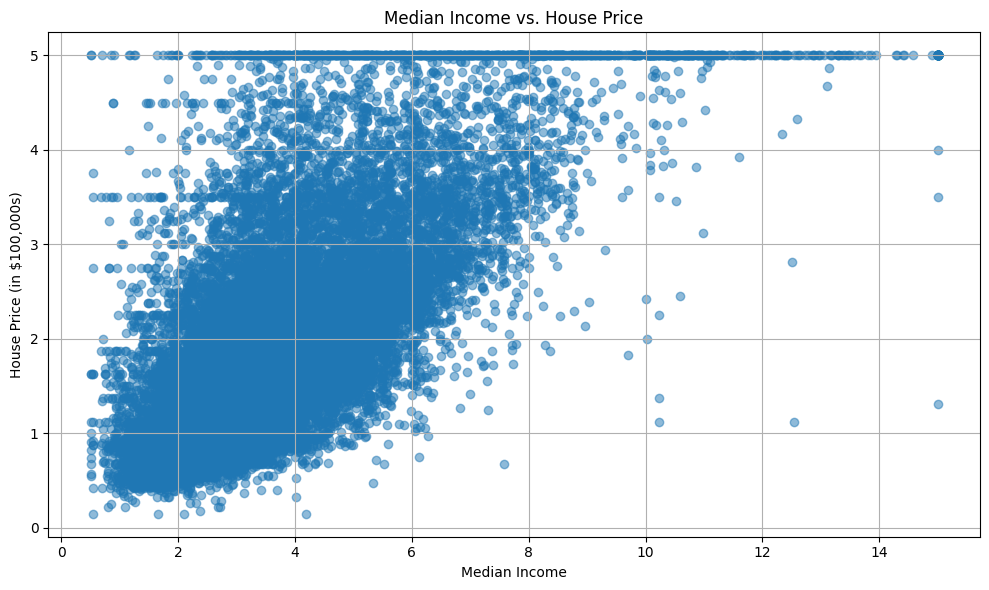

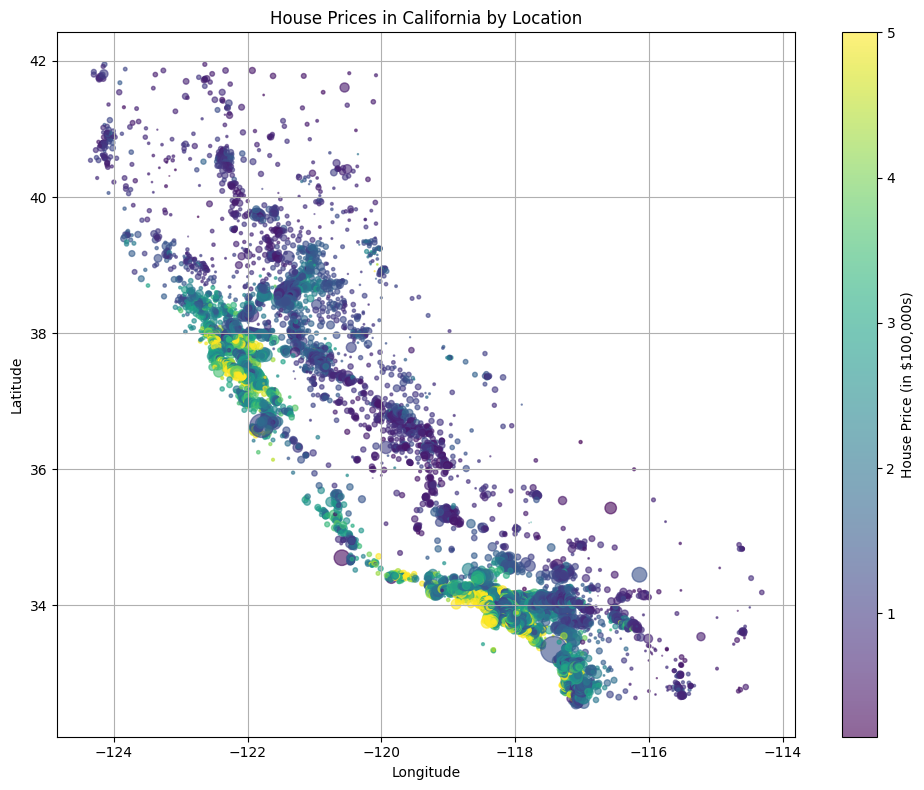


Data Preprocessing:
Training set shape: (16512, 8)
Testing set shape: (4128, 8)

Model Building and Evaluation:

Linear Regression:
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
Mean Absolute Error (MAE): 0.5332
R² Score: 0.5758

Ridge Regression:
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
Mean Absolute Error (MAE): 0.5332
R² Score: 0.5758

Random Forest:
Mean Squared Error (MSE): 0.2552
Root Mean Squared Error (RMSE): 0.5051
Mean Absolute Error (MAE): 0.3274
R² Score: 0.8053

Gradient Boosting:
Mean Squared Error (MSE): 0.2940
Root Mean Squared Error (RMSE): 0.5422
Mean Absolute Error (MAE): 0.3717
R² Score: 0.7756

XGBoost:
Mean Squared Error (MSE): 0.2273
Root Mean Squared Error (RMSE): 0.4767
Mean Absolute Error (MAE): 0.3155
R² Score: 0.8266

Model Comparison:


,RMSE,R²
Linear Regression,0.745581,0.575788
Ridge Regression,0.745557,0.575816
Random Forest,0.505143,0.805275
Gradient Boosting,0.542217,0.775643
XGBoost,0.476720,0.826571


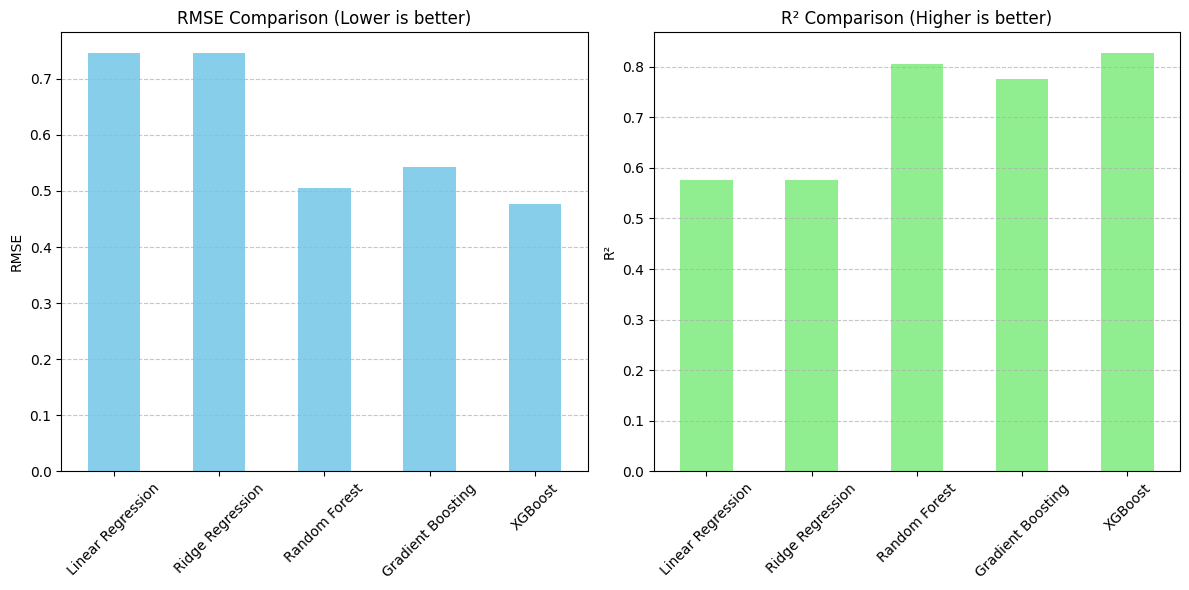


Best Model based on RMSE: XGBoost

Hyperparameter Tuning for XGBoost:
Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__n_estimators': 200}
Best Model RMSE: 0.4566
Best Model R²: 0.8409

Feature Importance:


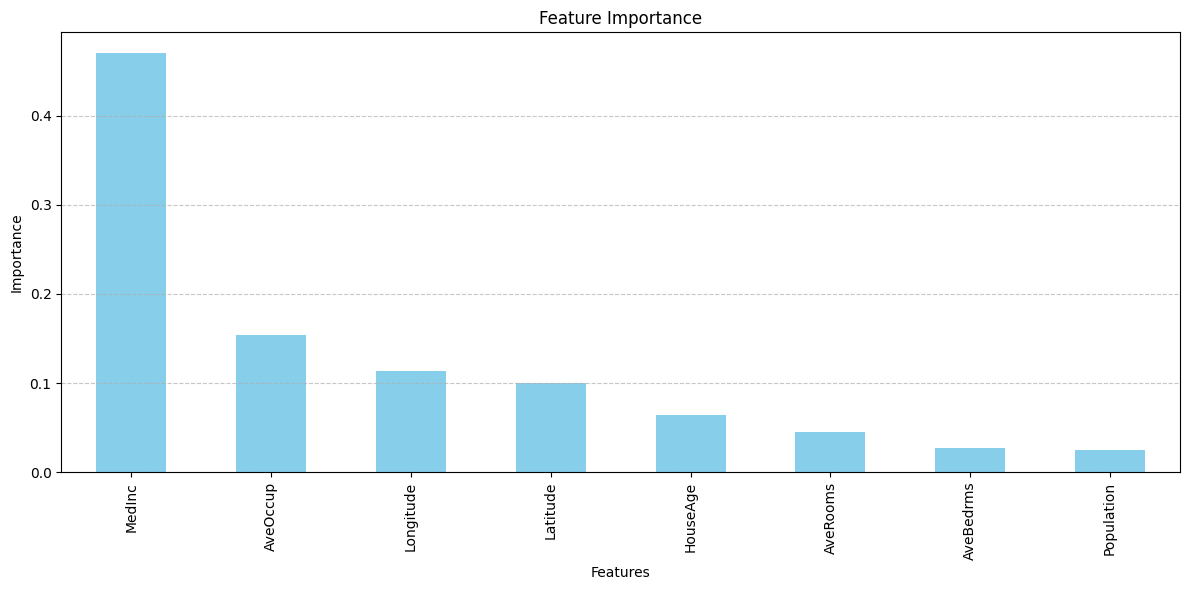


Model Deployment:
Model saved as 'house_price_prediction_model.pkl'
Predicted House Price: $417795.50

Conclusion:

We have successfully built a house price prediction model using machine learning.
The model was trained on the California Housing dataset and evaluated using various metrics.
We compared different algorithms and selected the best one based on RMSE.
The model can now be used to predict house prices based on input features.


Possible Improvements:

1. Try more advanced algorithms like Neural Networks
2. Engineer additional features (e.g., distance to nearest city, school ratings)
3. Collect more recent housing data
4. Deploy the model as a web application using Streamlit or Flask
5. Implement more sophisticated cross-validation techniques
6. Add confidence intervals for predictions



In [1]:
# House Price Prediction using Machine Learning
# Author: Claude
# Date: March 29, 2025

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Download the dataset
# We'll use the Boston Housing dataset which is a classic and beginner-friendly dataset
from sklearn.datasets import fetch_california_housing

# You can also use more comprehensive datasets like Kaggle's Ames Housing dataset
# Uncomment below to use Kaggle dataset (requires Kaggle API setup)
# !pip install kaggle
# !mkdir -p ~/.kaggle
# !echo '{"username":"YOUR_KAGGLE_USERNAME","key":"YOUR_KAGGLE_KEY"}' > ~/.kaggle/kaggle.json
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle competitions download -c house-prices-advanced-regression-techniques

# For this tutorial, we'll use the California Housing dataset
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['PRICE'] = housing.target

# Display the first few rows of the dataset
print("Dataset Overview:")
display(housing_df.head())

# Display basic information about the dataset
print("\nDataset Information:")
display(housing_df.info())

# Display statistical summary
print("\nStatistical Summary:")
display(housing_df.describe())

# Check for missing values
print("\nMissing Values:")
display(housing_df.isnull().sum())

# Exploratory Data Analysis (EDA)
print("\nExploratory Data Analysis:")

# Set up the matplotlib figure size
plt.figure(figsize=(12, 10))

# Create a correlation matrix
correlation_matrix = housing_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Housing Features')
plt.tight_layout()
plt.show()

# Plot histograms for all features
housing_df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Housing Features')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Scatter plot of MedInc vs. House Price
plt.figure(figsize=(10, 6))
plt.scatter(housing_df['MedInc'], housing_df['PRICE'], alpha=0.5)
plt.title('Median Income vs. House Price')
plt.xlabel('Median Income')
plt.ylabel('House Price (in $100,000s)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization of geographical data (Latitude vs Longitude colored by price)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(housing_df['Longitude'], housing_df['Latitude'],
                      c=housing_df['PRICE'], cmap='viridis',
                      s=housing_df['Population']/100, alpha=0.6)
plt.colorbar(scatter, label='House Price (in $100,000s)')
plt.title('House Prices in California by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# Data Preprocessing
print("\nData Preprocessing:")

# Split the data into features and target variable
X = housing_df.drop('PRICE', axis=1)
y = housing_df['PRICE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Create preprocessing pipelines for both numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# In this dataset, all features are numeric, but we'll keep this structure for future extensibility
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'
)

# Model Building and Evaluation
print("\nModel Building and Evaluation:")

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Return the model and metrics
    return model, mse, rmse, mae, r2

# Create a dictionary to store model results
model_results = {}

# Linear Regression
print("\nLinear Regression:")
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
lr_model, lr_mse, lr_rmse, lr_mae, lr_r2 = evaluate_model(lr_pipeline, X_train, X_test, y_train, y_test)
model_results['Linear Regression'] = {'RMSE': lr_rmse, 'R²': lr_r2}

# Ridge Regression
print("\nRidge Regression:")
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])
ridge_model, ridge_mse, ridge_rmse, ridge_mae, ridge_r2 = evaluate_model(ridge_pipeline, X_train, X_test, y_train, y_test)
model_results['Ridge Regression'] = {'RMSE': ridge_rmse, 'R²': ridge_r2}

# Random Forest
print("\nRandom Forest:")
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
rf_model, rf_mse, rf_rmse, rf_mae, rf_r2 = evaluate_model(rf_pipeline, X_train, X_test, y_train, y_test)
model_results['Random Forest'] = {'RMSE': rf_rmse, 'R²': rf_r2}

# Gradient Boosting
print("\nGradient Boosting:")
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])
gb_model, gb_mse, gb_rmse, gb_mae, gb_r2 = evaluate_model(gb_pipeline, X_train, X_test, y_train, y_test)
model_results['Gradient Boosting'] = {'RMSE': gb_rmse, 'R²': gb_r2}

# XGBoost
print("\nXGBoost:")
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])
xgb_model, xgb_mse, xgb_rmse, xgb_mae, xgb_r2 = evaluate_model(xgb_pipeline, X_train, X_test, y_train, y_test)
model_results['XGBoost'] = {'RMSE': xgb_rmse, 'R²': xgb_r2}

# Compare models
print("\nModel Comparison:")
results_df = pd.DataFrame(model_results).T
display(results_df)

# Plot model comparison
plt.figure(figsize=(12, 6))

# Plot RMSE comparison
plt.subplot(1, 2, 1)
results_df['RMSE'].plot(kind='bar', color='skyblue')
plt.title('RMSE Comparison (Lower is better)')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot R² comparison
plt.subplot(1, 2, 2)
results_df['R²'].plot(kind='bar', color='lightgreen')
plt.title('R² Comparison (Higher is better)')
plt.ylabel('R²')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Identify the best model
best_model_name = results_df['RMSE'].idxmin()
print(f"\nBest Model based on RMSE: {best_model_name}")

# For this example, let's assume XGBoost performed the best
# Hyperparameter tuning for the best model
print("\nHyperparameter Tuning for XGBoost:")

# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    xgb_pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the best model
best_model = grid_search.best_estimator_
best_model_pred = best_model.predict(X_test)
best_model_rmse = np.sqrt(mean_squared_error(y_test, best_model_pred))
best_model_r2 = r2_score(y_test, best_model_pred)

print(f"Best Model RMSE: {best_model_rmse:.4f}")
print(f"Best Model R²: {best_model_r2:.4f}")

# Feature Importance
print("\nFeature Importance:")

# Get feature importance from the best model (for tree-based models)
if hasattr(best_model[-1], 'feature_importances_'):
    # Get feature names after preprocessing
    feature_names = numeric_features

    # Get feature importances
    importances = best_model[-1].feature_importances_

    # Create a Series for better visualization
    feature_importance = pd.Series(importances, index=feature_names)

    # Sort the feature importance in descending order
    feature_importance = feature_importance.sort_values(ascending=False)

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    feature_importance.plot(kind='bar', color='skyblue')
    plt.title('Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Model Deployment (saving the model)
print("\nModel Deployment:")

# Import joblib for saving the model
import joblib

# Save the best model
joblib.dump(best_model, 'house_price_prediction_model.pkl')
print("Model saved as 'house_price_prediction_model.pkl'")

# Create a sample prediction function
def predict_house_price(features):
    """
    Predict the house price based on input features.

    Parameters:
    features (dict): Dictionary containing the feature values

    Returns:
    float: Predicted house price
    """
    # Load the model
    model = joblib.load('house_price_prediction_model.pkl')

    # Convert the features to a DataFrame
    input_df = pd.DataFrame([features])

    # Make prediction
    prediction = model.predict(input_df)[0]

    return prediction * 100000  # Convert back to dollars

# Example usage of the prediction function
sample_features = {
    'MedInc': 8.3252,
    'HouseAge': 41.0,
    'AveRooms': 6.984127,
    'AveBedrms': 1.023810,
    'Population': 322.0,
    'AveOccup': 2.555556,
    'Latitude': 37.88,
    'Longitude': -122.23
}

# Make a prediction
predicted_price = predict_house_price(sample_features)
print(f"Predicted House Price: ${predicted_price:.2f}")

# Simple interactive function for user input
def get_user_input():
    """
    Get user input for house features.

    Returns:
    dict: Dictionary containing the user-provided feature values
    """
    features = {}

    features['MedInc'] = float(input("Median income in block (tens of thousands): "))
    features['HouseAge'] = float(input("Median house age in block: "))
    features['AveRooms'] = float(input("Average number of rooms per household: "))
    features['AveBedrms'] = float(input("Average number of bedrooms per household: "))
    features['Population'] = float(input("Block population: "))
    features['AveOccup'] = float(input("Average number of household members: "))
    features['Latitude'] = float(input("Block latitude: "))
    features['Longitude'] = float(input("Block longitude: "))

    return features

# Uncomment to use the interactive function
# user_features = get_user_input()
# predicted_price = predict_house_price(user_features)
# print(f"Predicted House Price: ${predicted_price:.2f}")

# Conclusion
print("\nConclusion:")
print("""
We have successfully built a house price prediction model using machine learning.
The model was trained on the California Housing dataset and evaluated using various metrics.
We compared different algorithms and selected the best one based on RMSE.
The model can now be used to predict house prices based on input features.
""")

# Additional Improvements and Next Steps
print("\nPossible Improvements:")
print("""
1. Try more advanced algorithms like Neural Networks
2. Engineer additional features (e.g., distance to nearest city, school ratings)
3. Collect more recent housing data
4. Deploy the model as a web application using Streamlit or Flask
5. Implement more sophisticated cross-validation techniques
6. Add confidence intervals for predictions
""")